In [1]:
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
trans= pd.read_csv('trans.csv', delimiter=',', low_memory=False)

In [3]:
trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,PRIJEM,NaN,62.3,13729.4,UROK,NaN,NaN
1056316,3627616,2935,981231,PRIJEM,NaN,81.3,19544.9,UROK,NaN,NaN
1056317,3625403,2869,981231,PRIJEM,NaN,60.2,14638.2,UROK,NaN,NaN
1056318,3626683,2907,981231,PRIJEM,NaN,107.5,23453.0,UROK,NaN,NaN


In [4]:
# Trans rename 
trans['type'].replace('PRIJEM','credit',inplace=True)
trans['type'].replace('VYDAJ','withdrawal',inplace = True)
trans['type'].replace('VYBER','withdrawal',inplace = True)
trans['operation'].replace('VYBER KARTOU','creditcard_wd',inplace=True)
trans['operation'].replace('VKLAD','credit_in_cash',inplace=True)
trans['operation'].replace('PREVOD Z UCTU','coll_from_bank',inplace=True)
trans['operation'].replace('VYBER','cash_wd',inplace=True)
trans['operation'].replace('PREVOD NA UCET','remi_to_bank',inplace=True)
trans['k_symbol'].replace('POJISTNE','ins_paymt',inplace=True) # insurrance payment
trans['k_symbol'].replace('SLUZBY','paymt_for_stmt',inplace=True) # payment for statement(?)
trans['k_symbol'].replace('UROK','int_credited',inplace=True) # interest credited
trans['k_symbol'].replace('SANKC. UROK','sanc_int',inplace=True) # sanction interest for neg balance
trans['k_symbol'].replace('SIPO','household',inplace=True)
trans['k_symbol'].replace('DUCHOD','pension',inplace=True) # old-age pension
trans['k_symbol'].replace('UVER','loan_paymt',inplace=True) # loan payment
trans['k_symbol'].replace(' ','unknown_trans_cate',inplace=True)
trans = trans.rename(columns = {"date":"trans_date","amount":"trans_amount","type":"trans_type",
                                                    "k_symbol":"trans_category","bank":"bank_partner","account":"account_partner"})

In [5]:
trans

,trans_id,account_id,trans_date,trans_type,operation,trans_amount,balance,trans_category,bank_partner,account_partner
0,695247,2378,930101,credit,credit_in_cash,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,credit,credit_in_cash,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,credit,credit_in_cash,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,credit,credit_in_cash,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,credit,credit_in_cash,400.0,400.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,credit,NaN,62.3,13729.4,int_credited,NaN,NaN
1056316,3627616,2935,981231,credit,NaN,81.3,19544.9,int_credited,NaN,NaN
1056317,3625403,2869,981231,credit,NaN,60.2,14638.2,int_credited,NaN,NaN
1056318,3626683,2907,981231,credit,NaN,107.5,23453.0,int_credited,NaN,NaN


In [6]:
#trans.info()
#missing information resolution 
trans['bank_partner'].fillna('no_partner',inplace=True)
trans['account_partner'].fillna(0,inplace=True)
trans['trans_category'].fillna('unknown_trans_cate',inplace=True)
trans['operation'].fillna('unknown_operation',inplace=True)

In [7]:
trans

,trans_id,account_id,trans_date,trans_type,operation,trans_amount,balance,trans_category,bank_partner,account_partner
0,695247,2378,930101,credit,credit_in_cash,700.0,700.0,unknown_trans_cate,no_partner,0.0
1,171812,576,930101,credit,credit_in_cash,900.0,900.0,unknown_trans_cate,no_partner,0.0
2,207264,704,930101,credit,credit_in_cash,1000.0,1000.0,unknown_trans_cate,no_partner,0.0
3,1117247,3818,930101,credit,credit_in_cash,600.0,600.0,unknown_trans_cate,no_partner,0.0
4,579373,1972,930102,credit,credit_in_cash,400.0,400.0,unknown_trans_cate,no_partner,0.0
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,credit,unknown_operation,62.3,13729.4,int_credited,no_partner,0.0
1056316,3627616,2935,981231,credit,unknown_operation,81.3,19544.9,int_credited,no_partner,0.0
1056317,3625403,2869,981231,credit,unknown_operation,60.2,14638.2,int_credited,no_partner,0.0
1056318,3626683,2907,981231,credit,unknown_operation,107.5,23453.0,int_credited,no_partner,0.0


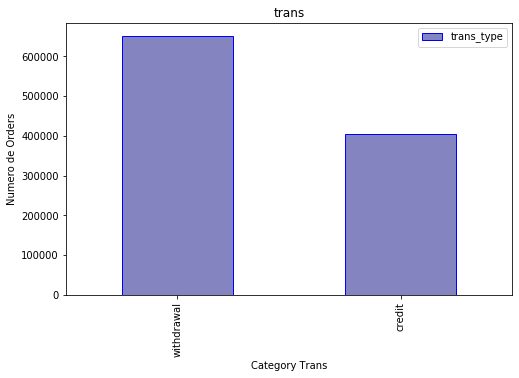

In [16]:
en_order= np.arange(len(trans['trans_id']))
plt.rcParams['figure.figsize']=(8,5)
plt.title('trans',fontsize='15')
plt.ylabel('Numero de Orders',fontsize='15')
plt.xlabel('Category Trans',fontsize='15')

trans['trans_type'].value_counts().plot(kind='bar', color =(0.2,0.2,0.6,0.6), edgecolor ='blue',legend='best',)

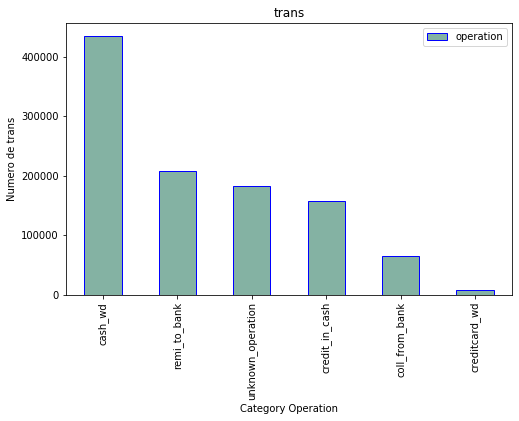

In [15]:
en_order= np.arange(len(trans['trans_id']))
plt.rcParams['figure.figsize']=(8,5)
plt.title('trans',fontsize='15')
plt.ylabel('Numero de trans',fontsize='15')
plt.xlabel('Category Operation',fontsize='15')

trans['operation'].value_counts().plot(kind='bar', color =(0.2,0.5,0.4,0.6), edgecolor ='blue',legend='best')

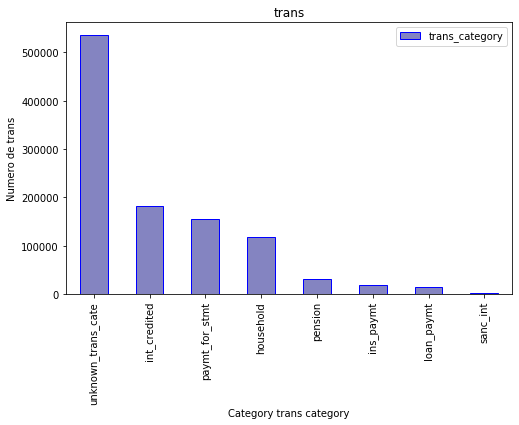

In [14]:
en_order= np.arange(len(trans['trans_id']))
plt.rcParams['figure.figsize']=(8,5)
plt.title('trans')
plt.ylabel('Numero de trans')
plt.xlabel('Category trans category')

trans['trans_category'].value_counts().plot(kind='bar', color =(0.2,0.2,0.6,0.6), edgecolor ='blue',legend='best')

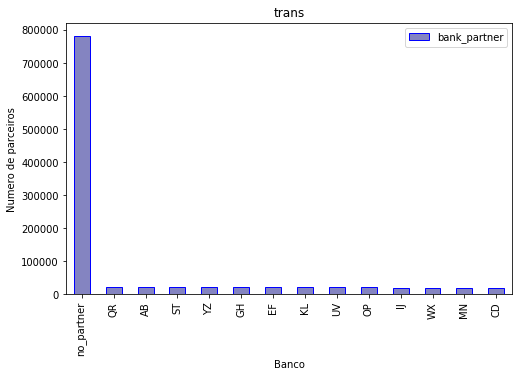

In [13]:
en_order= np.arange(len(trans['trans_id']))
plt.rcParams['figure.figsize']=(8,5)
plt.title('trans',fontsize='15')
plt.ylabel('Numero de parceiros',fontsize='15')
plt.xlabel('Banco',fontsize='15')

trans['bank_partner'].value_counts().plot(kind='bar', color =(0.2,0.2,0.6,0.6), edgecolor ='blue', legend='best')